# 0.) Import and Clean data

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [56]:
df = pd.read_csv("Country-data.csv", sep = ",")

In [57]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [58]:
names = df[["country"]].copy()
X=df.drop(["country"],axis = 1)

In [59]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [60]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

# 2.) Pick two features to visualize across

In [61]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

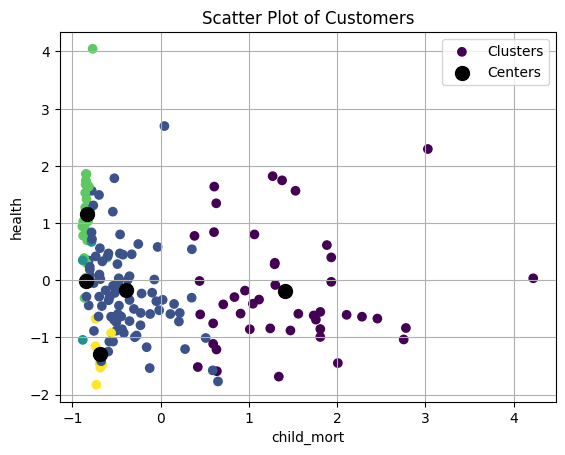

In [62]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 2


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [64]:
WCSS = []
Ks = range(1,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)

In [65]:
WCSS

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.5205369722205,
 631.4350499552104,
 575.071990438175,
 518.6204447572197,
 457.8216768751008,
 441.9774941029751,
 403.92248788342147,
 373.15728926053646,
 366.49715486024957,
 338.8462045657193,
 328.03605871377573]

In [66]:
#BONUS OPTIONAL (ONE LINER CODE)
WCSS = [KMeans(n_clusters=k, n_init=30, init="random").fit(X_scaled).inertia_ for k in range(1, 15)]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

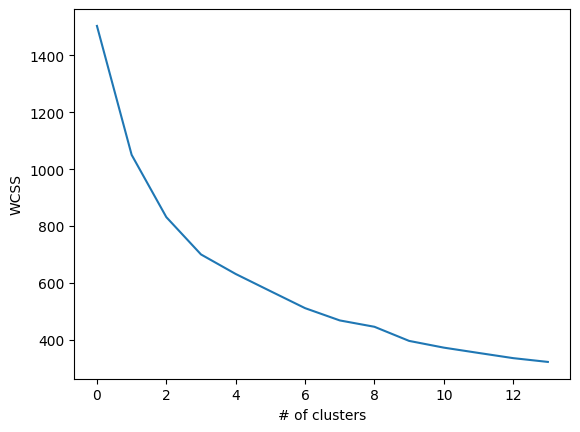

In [67]:
plt.plot(WCSS)
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.show()

# 6.) Do the same for a silhoutte plot

In [69]:
from sklearn.metrics import silhouette_score

In [88]:
SS=[]
Ks = range(2,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
    kmeans.fit(X_scaled)
    labs = kmeans.labels_
    sil = silhouette_score(X_scaled,labs)
    SS.append(sil)

SS

[0.287356689214067,
 0.28329575683463126,
 0.301375962376881,
 0.30576204229686116,
 0.2329331222159969,
 0.2425120842510139,
 0.23751698911767735,
 0.22724800308169296,
 0.21620804729573842,
 0.20744846637290013,
 0.20004247524141025,
 0.2105704306577975,
 0.2267378066185641]

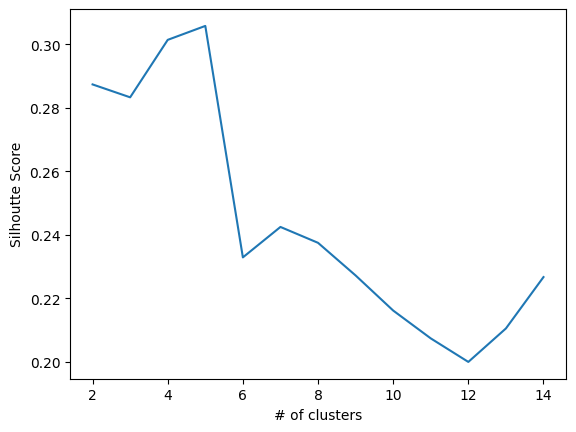

In [89]:
plt.plot(Ks, SS)
plt.ylabel("Silhoutte Score")
plt.xlabel("# of clusters")
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [96]:
kmeans = KMeans(n_clusters=2, n_init=30, init="random").fit(X_scaled)

In [97]:
preds = pd.DataFrame(kmeans.predict(X_scaled))
preds

,0
0,0
1,1
2,1
3,0
4,1
...,...
162,0
163,1
164,1
165,0


In [98]:
output = pd.concat([preds,df], axis = 1)
output.rename(columns = {0:"Clusters"},inplace=True)
output

,Clusters,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [102]:
#to print all countries in clusters 0
print("Clusters 0: ")
list(output.loc[output["Clusters"]==0, "country"])

Clusters 0: 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [106]:
#to print all countries in clusters 1
print("Clusters 1: ")
list(output.loc[output["Clusters"]==1, "country"])

Clusters 1: 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

Intuitively, the Cluster 0 seems to incldue countries which are developing and low-income countries and the Cluster 1 seems to include countries which are developed and high income countries. 

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [110]:
numeric_cols = output.select_dtypes(include=[np.number]).drop(columns = ["Clusters"])
numeric_cols.groupby(output["Clusters"]).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clusters,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [112]:
numeric_cols.groupby(output["Clusters"]).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clusters,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


In [111]:
numeric_cols.groupby(output["Clusters"]).describe()

child_mort                                                          \
              count       mean        std   min   25%   50%      75%    max   
Clusters                                                                      
0              68.0  76.280882  38.076068  17.4  48.8  65.6  100.025  208.0   
1              99.0  12.161616   8.523122   2.6   4.7  10.3   17.300   42.7   

         exports             ... total_fer        gdpp                \
           count       mean  ...       75%   max count          mean   
Clusters                     ...                                       
0           68.0  30.198515  ...    5.3175  7.49  68.0   1981.235294   
1           99.0  48.603030  ...    2.2000  3.66  99.0  20507.979798   

                                                                     
                   std     min      25%      50%      75%       max  
Clusters                                                             
0          2528.509189   231.0   594.25   1155.0   2672.5   17100.0  
1         20578.727127  1310.0  5430.00  11900.0  32250.0  105000.0  

[2 rows x 72 columns]

# 9.) Write an observation about the descriptive statistics.

Comparing the mean and standard deviation from Cluster 0 and Cluster 1, we can assert now that the dataset seem to indicate the development status of the countries depending on these features. The mean of Cluster 0 shows higher child mortality rate, higher inflation rate and lower GDP, idnicating developing and lower income status of these countries. However, these countries within the cluster also show variablity in their child mortality rate. Showing certain countries with different rates for this feature. On the other hand, mean of the Cluster 1 countries show lower child mortality rate, lower inflaton rate and higher GDP. However, in terms of GDP and income there is a higher variability amongst the countries in this cluster 1.

The data seems to be outdated because the Cluster 0 contains certains country names which are performing far better on these parameters and the Cluster 1 contains certain country names which are now seeing major economic upheavals and are performing far much worse than countries in Cluster 0.